# Install Packages

In [2]:
install.packages("tidyverse", dep = TRUE)

Installing package into ‘/home/ubuntu/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘curl’, ‘openssl’, ‘httr’, ‘rvest’, ‘feather’

Warning message in install.packages("tidyverse", dep = TRUE):
“installation of package ‘curl’ had non-zero exit status”Warning message in install.packages("tidyverse", dep = TRUE):
“installation of package ‘openssl’ had non-zero exit status”Warning message in install.packages("tidyverse", dep = TRUE):
“installation of package ‘httr’ had non-zero exit status”Warning message in install.packages("tidyverse", dep = TRUE):
“installation of package ‘rvest’ had non-zero exit status”Warning message in install.packages("tidyverse", dep = TRUE):
“installation of package ‘tidyverse’ had non-zero exit status”

# Load Packages

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Pull Datasets

In [2]:
data = read.csv("CleanRefugeeData.csv")
tail(data,10)

,X,Year,People,CountryTo,CountryFrom,ContinentFrom,ContinentTo
96052,96051,2000,1,Canada,Bermuda,North America,North America
96053,96052,1999,1,Canada,Bermuda,North America,North America
96054,96053,1998,1,Canada,Bermuda,North America,North America
96055,96054,2004,2,Germany,Holy See (the),Europe,Europe
96056,96055,1997,1,Morocco,Martinique,North America,Africa
96057,96056,1996,1,Morocco,Martinique,North America,Africa
96058,96057,1995,1,Morocco,Martinique,North America,Africa
96059,96058,1996,12,Canada,Puerto Rico,North America,North America
96060,96059,1995,12,Canada,Puerto Rico,North America,North America
96061,96060,1994,12,Canada,Puerto Rico,North America,North America


# Explore Data

In [3]:
summary(data)

       X              Year          People                 CountryTo    
 Min.   :    0   Min.   :1975   Min.   :      1   United States : 4011  
 1st Qu.:24015   1st Qu.:2000   1st Qu.:      3   Canada        : 3917  
 Median :48030   Median :2007   Median :     14   Sweden        : 3322  
 Mean   :48030   Mean   :2005   Mean   :   4947   Netherlands   : 2932  
 3rd Qu.:72045   3rd Qu.:2012   3rd Qu.:    129   Italy         : 2816  
 Max.   :96060   Max.   :2016   Max.   :3272290   United Kingdom: 2622  
                                NA's   :198       (Other)       :76441  
                 CountryFrom          ContinentFrom          ContinentTo   
 Various               : 2347   Africa       :40654   Europe       :46190  
 Somalia               : 2243   Asia         :28642   Africa       :16211  
 Iraq                  : 2091   Europe       :13014   North America:11656  
 Dem. Rep. of the Congo: 2061   North America: 5083   Asia         :10190  
 Sudan                 : 1995   Sout

# See the refugee movement from a given year

In [8]:
data[data$Year == 2015,] %>% 
    group_by(ContinentFrom) %>%
        summarise(Total = sum(People, na.rm = TRUE))

ContinentFrom,Total
Africa,5291171
Asia,9300855
Australia,20
Europe,509047
North Africa,17926
North America,96551
Oceania,484
South America,105753
Various,157548


# See the refugee movement from Asia over the years

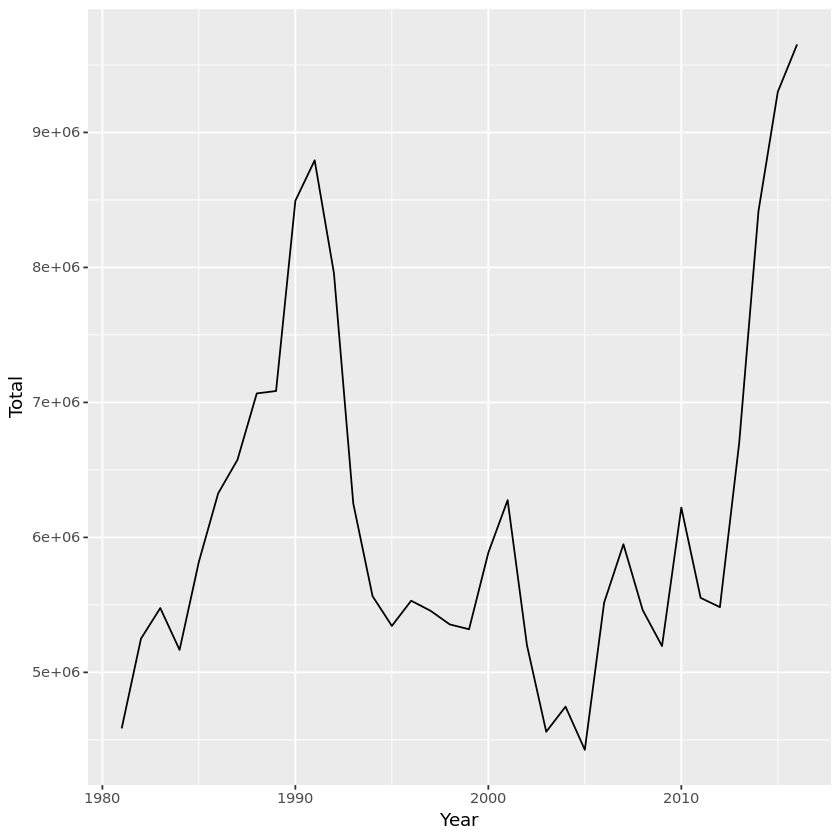

In [9]:
data[data$ContinentFrom == "Asia"  & data$Year > 1980,] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE)) %>%
            ggplot( ,mapping = aes(Year,Total)) + geom_line()

# See the refugee movement from Syria over the years

In [37]:
data[data$CountryFrom == "Syrian Arab Rep."  & data$Year > 1980,] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE))

Year,Total
1981,504
1982,504
1983,526
1984,529
1985,2599
1986,534
1987,20
1988,881
1989,397
1990,2148


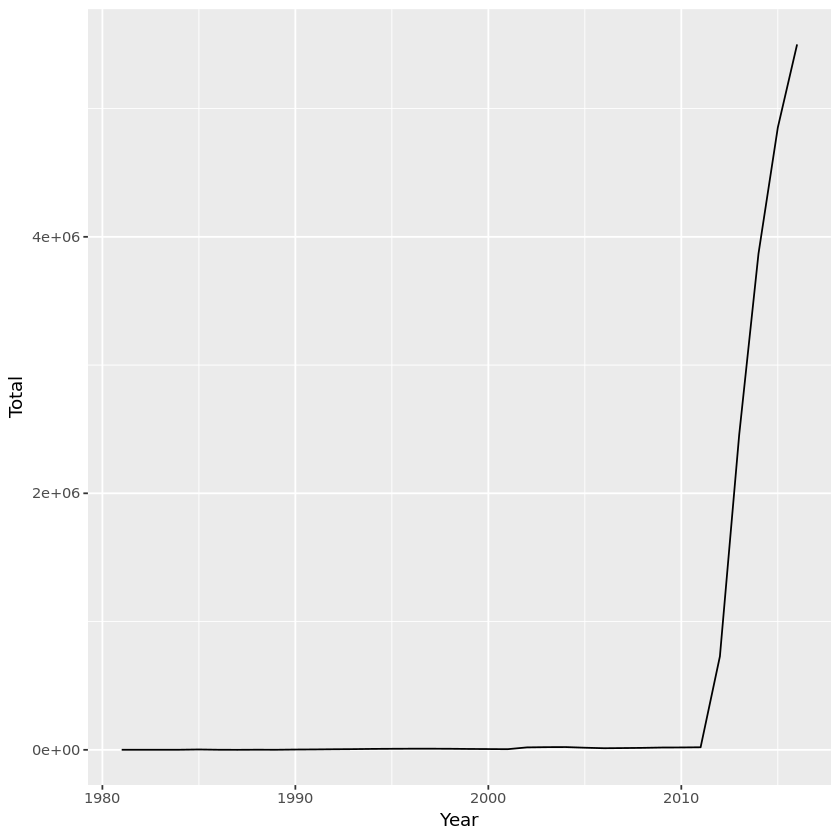

In [10]:
data[data$CountryFrom == "Syrian Arab Rep."  & data$Year > 1980,] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE)) %>%
            ggplot( ,mapping = aes(Year,Total)) + geom_line()

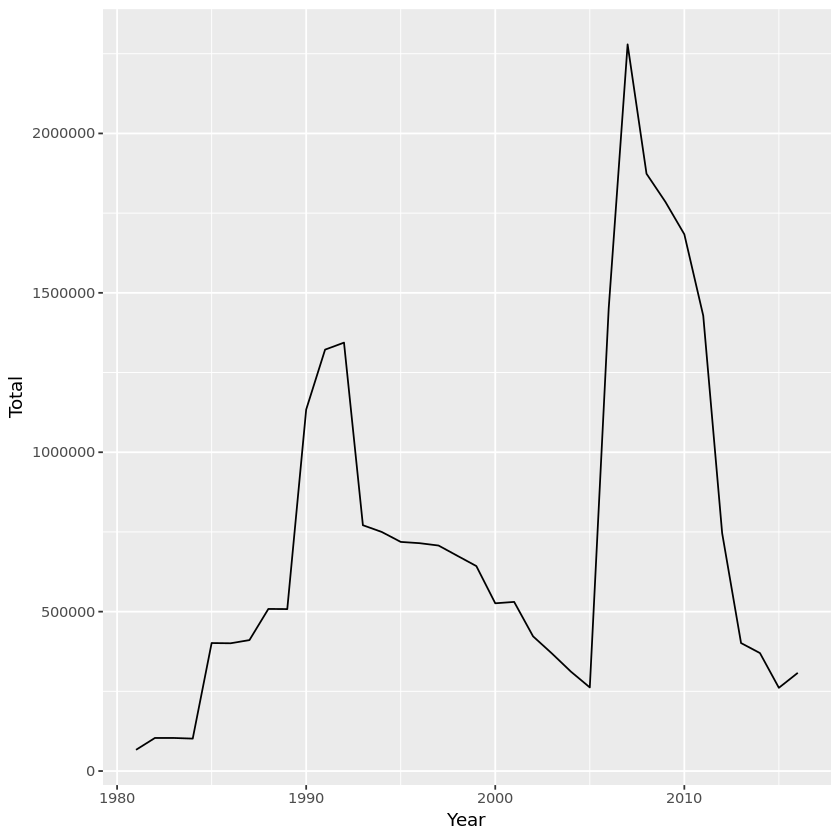

In [11]:
data[data$CountryFrom == "Iraq"  & data$Year > 1980,] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE)) %>%
            ggplot( ,mapping = aes(Year,Total)) + geom_line()

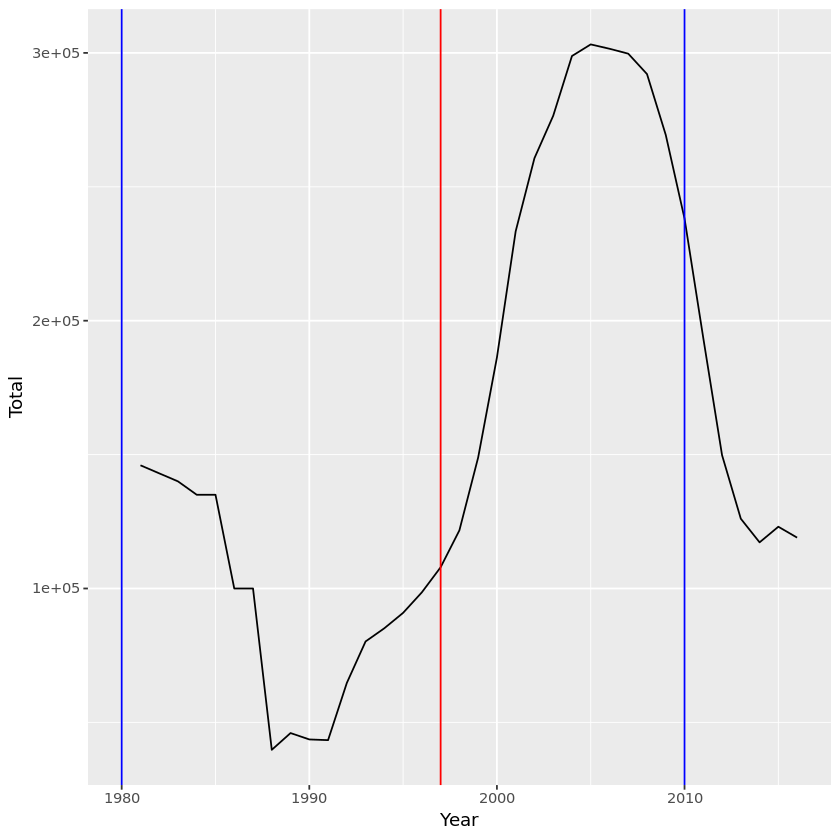

In [16]:
data[data$CountryTo == "United Kingdom"  & data$Year > 1980,] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE)) %>%
            ggplot( ,mapping = aes(Year,Total)) + geom_line() +
            geom_vline(xintercept = 1980, colour="blue") +
            geom_vline(xintercept = 1997, colour="red") +
            geom_vline(xintercept = 2010, colour="blue")

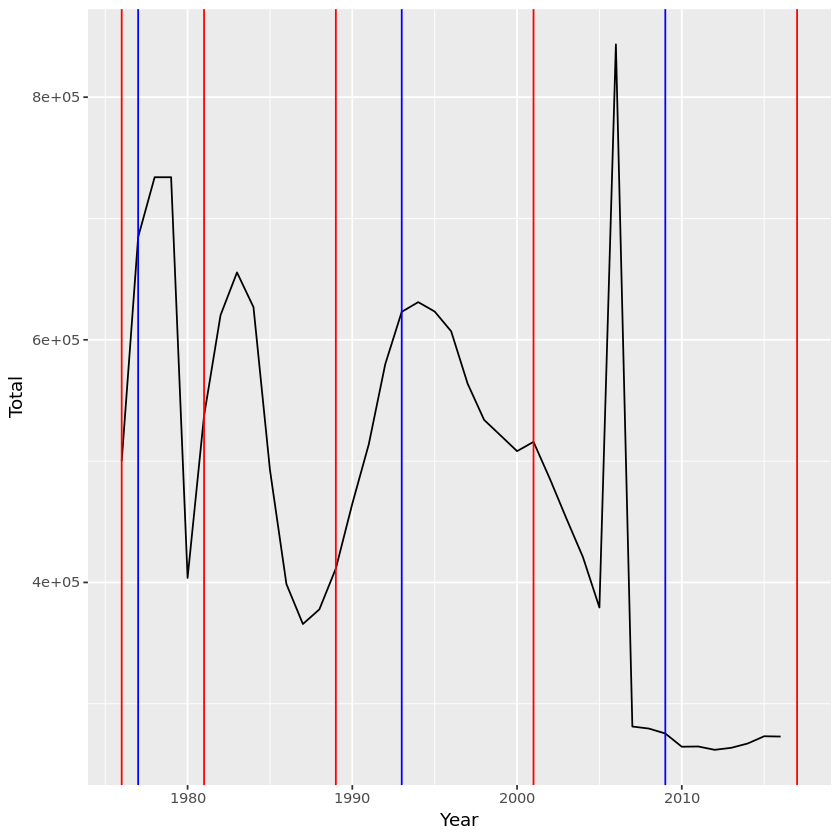

In [22]:
data[data$CountryTo == "United States"  & data$Year > 1975,] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE)) %>%
            ggplot( ,mapping = aes(Year,Total)) + geom_line()  +
                geom_vline(xintercept = 1976, color = "red") +
                geom_vline(xintercept = 1977, color = "blue") +
                geom_vline(xintercept = 1981, color = "red") +
                geom_vline(xintercept = 1989, color = "red") +
                geom_vline(xintercept = 1993, color = "blue") +
                geom_vline(xintercept = 2001, color = "red") +
                geom_vline(xintercept = 2009, color = "blue") +
                geom_vline(xintercept = 2017, color = "red")

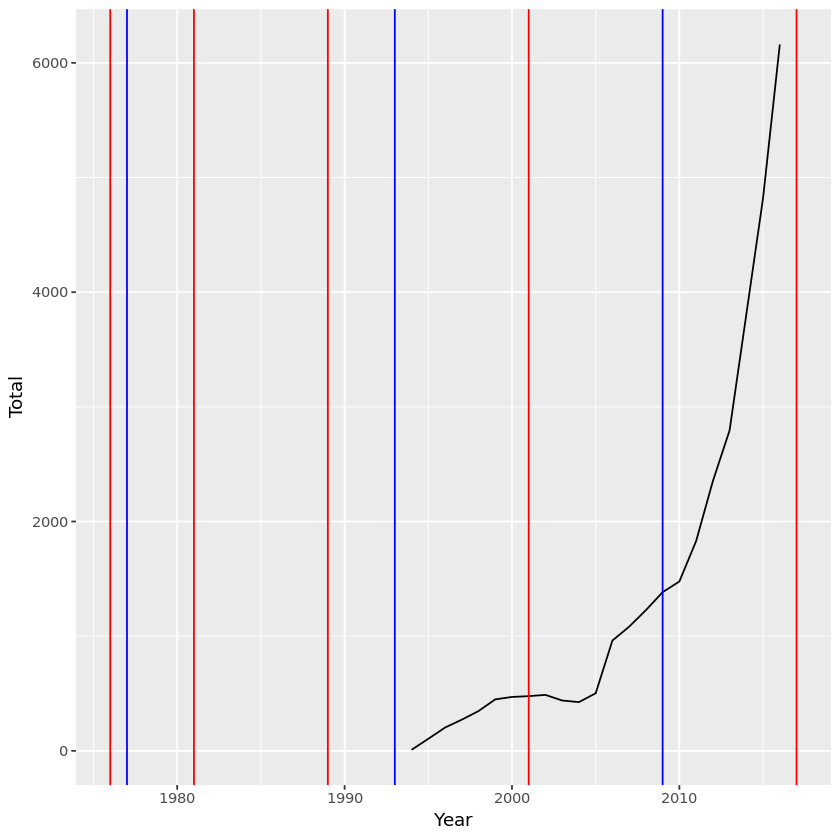

In [23]:
data[data$CountryTo == "United States"  & data$Year > 1975 & data$CountryFrom == "Mexico",] %>% 
    group_by(Year) %>%
        summarise(Total = sum(People, na.rm = TRUE)) %>%
            ggplot( ,mapping = aes(Year,Total)) + geom_line()  +
                geom_vline(xintercept = 1976, color = "red") +
                geom_vline(xintercept = 1977, color = "blue") +
                geom_vline(xintercept = 1981, color = "red") +
                geom_vline(xintercept = 1989, color = "red") +
                geom_vline(xintercept = 1993, color = "blue") +
                geom_vline(xintercept = 2001, color = "red") +
                geom_vline(xintercept = 2009, color = "blue") +
                geom_vline(xintercept = 2017, color = "red")